In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
df = pd.read_parquet('lance_loans_cache.parquet')
df.head()

,ID,bounce_first_EMI,num_bounce_12m,max_mob,num_bounced_repaying,EMI,Loan_Amount,Tenure,Dealer_code,Product_code_two_wheeler,...,sanctioned_amt_sercured,sanctioned_amt_uunsecured,max_sanctioned_twoWheeler,last_loan,first_loan,num_30d_pastDue_6m,num_60d_pastDue_6m,num_90d_pastDue_3m,Tier,default
0,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,'TIER 1',0
1,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,'TIER 1',0
2,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,'TIER 1',0
3,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,'TIER 1',0
4,6,0,2,28.0,3.0,1802.0,40800.0,30.0,4140.0,SC,...,NaN,NaN,40800.0,NaN,NaN,0,0,0,'TIER 1',0


In [ ]:
#Check data types, non-null values, etc.
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 119527 entries, 0 to 119526
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   ID                         119527 non-null  int64
 1   bounce_first_EMI           119527 non-null  str  
 2   num_bounce_12m             119527 non-null  str  
 3   max_mob                    85047 non-null   str  
 4   num_bounced_repaying       85047 non-null   str  
 5   EMI                        85047 non-null   str  
 6   Loan_Amount                85047 non-null   str  
 7   Tenure                     85047 non-null   str  
 8   Dealer_code                85047 non-null   str  
 9   Product_code_two_wheeler   85047 non-null   str  
 10  no_advanceEmi_paid         85047 non-null   str  
 11  interest                   85047 non-null   str  
 12  Gender                     85047 non-null   str  
 13  Employment                 85047 non-null   str  
 14  res_type       

In [7]:
print(df.columns)

Index(['ID', 'bounce_first_EMI', 'num_bounce_12m', 'max_mob',
       'num_bounced_repaying', 'EMI', 'Loan_Amount', 'Tenure', 'Dealer_code',
       'Product_code_two_wheeler', 'no_advanceEmi_paid', 'interest', 'Gender',
       'Employment', 'res_type', 'DOB', 'age', 'num_loans', 'num_secured',
       'num_unsecured', 'max_sanctioned_live', 'num_newLoans_3m',
       'sanctioned_amt_sercured', 'sanctioned_amt_uunsecured',
       'max_sanctioned_twoWheeler', 'last_loan', 'first_loan',
       'num_30d_pastDue_6m', 'num_60d_pastDue_6m', 'num_90d_pastDue_3m',
       'Tier', 'default'],
      dtype='str')


In [ ]:
#correct data types
def changeTypes(df):
    float_cols = [ 'max_mob',
       'num_bounced_repaying', 'EMI', 'Loan_Amount', 'Tenure', 'Dealer_code',
        'no_advanceEmi_paid', 'interest',
       'age', 'max_sanctioned_live',
       'sanctioned_amt_sercured', 'sanctioned_amt_uunsecured',
       'max_sanctioned_twoWheeler', 'last_loan', 'first_loan']
    df[float_cols] = df[float_cols].astype('float64')
    int_cols = ['ID', 'bounce_first_EMI', 'num_bounce_12m', 'num_loans', 'num_secured',
       'num_unsecured','num_newLoans_3m','num_30d_pastDue_6m', 'num_60d_pastDue_6m', 'num_90d_pastDue_3m','default']
    df[int_cols] = df[int_cols].astype('Int64')
    
changeTypes(df)




In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 119527 entries, 0 to 119526
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         119527 non-null  Int64  
 1   bounce_first_EMI           119527 non-null  Int64  
 2   num_bounce_12m             119527 non-null  Int64  
 3   max_mob                    85047 non-null   float64
 4   num_bounced_repaying       85047 non-null   float64
 5   EMI                        85047 non-null   float64
 6   Loan_Amount                85047 non-null   float64
 7   Tenure                     85047 non-null   float64
 8   Dealer_code                85047 non-null   float64
 9   Product_code_two_wheeler   85047 non-null   str    
 10  no_advanceEmi_paid         85047 non-null   float64
 11  interest                   85047 non-null   float64
 12  Gender                     85047 non-null   str    
 13  Employment                 85047 non-nul

(array([4.7270e+03, 1.2963e+04, 1.4111e+04, 1.3657e+04, 1.3308e+04,
        1.1345e+04, 8.7600e+03, 5.2940e+03, 8.7700e+02, 5.0000e+00]),
 array([18. , 22.9, 27.8, 32.7, 37.6, 42.5, 47.4, 52.3, 57.2, 62.1, 67. ]),
 <BarContainer object of 10 artists>)

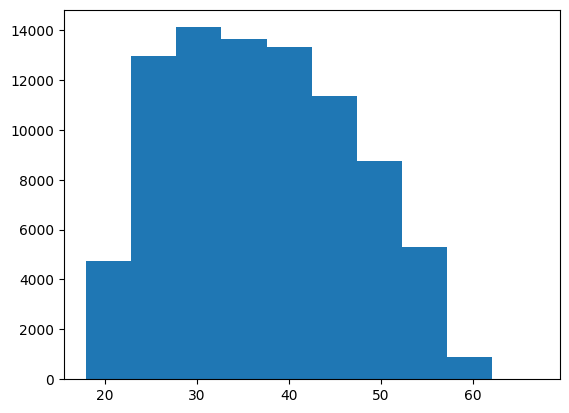

In [ ]:
#Age distribution
plt.hist(df['age'])

(array([7.1500e+02, 1.1619e+04, 2.4461e+04, 1.6279e+04, 2.3888e+04,
        6.3840e+03, 1.3740e+03, 2.9000e+02, 3.3000e+01, 4.0000e+00]),
 array([10000., 18600., 27200., 35800., 44400., 53000., 61600., 70200.,
        78800., 87400., 96000.]),
 <BarContainer object of 10 artists>)

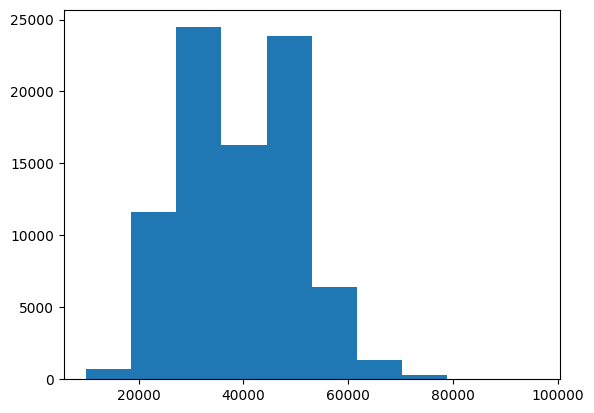

In [16]:
plt.hist(df['Loan_Amount'])

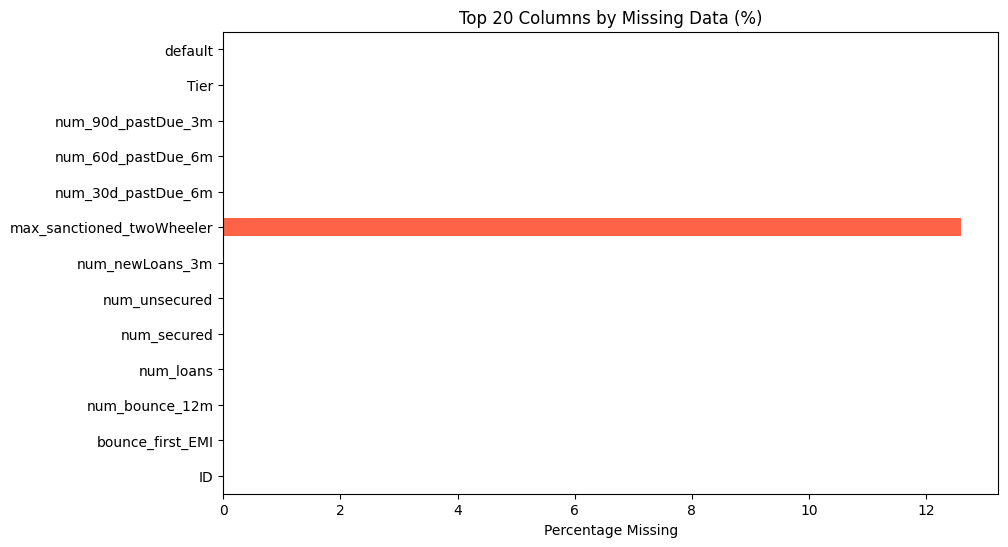

In [28]:
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage < 20]

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='barh', color='tomato')
plt.title('Top 20 Columns by Missing Data (%)')
plt.xlabel('Percentage Missing')
plt.show()

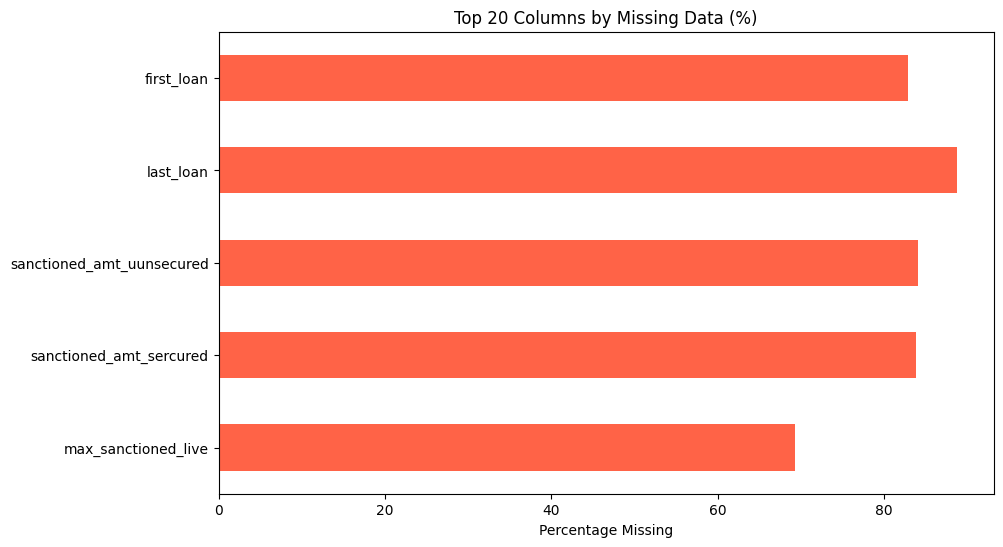

In [32]:
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 30]

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='barh', color='tomato')
plt.title('Top 20 Columns by Missing Data (%)')
plt.xlabel('Percentage Missing')
plt.show()

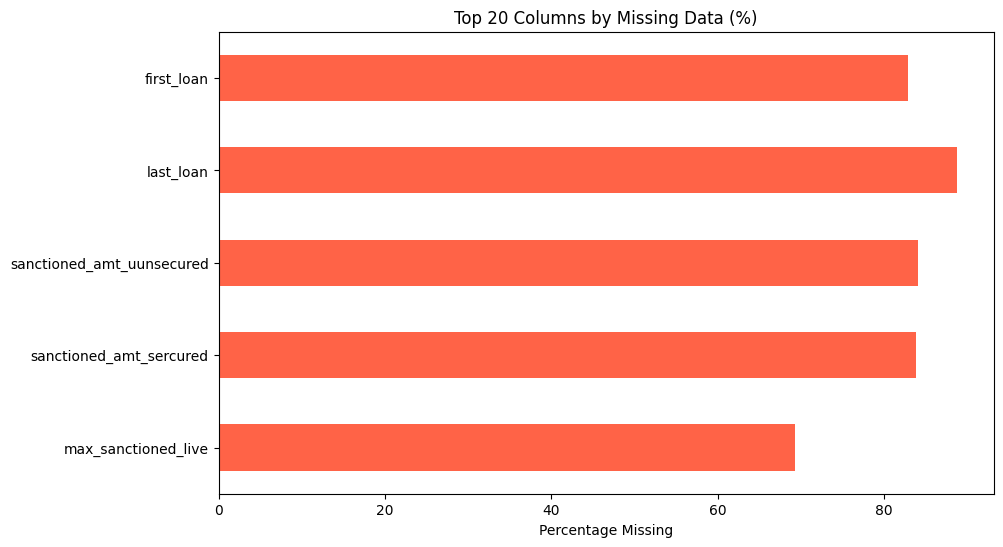

In [31]:
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 50]

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='barh', color='tomato')
plt.title('Top 20 Columns by Missing Data (%)')
plt.xlabel('Percentage Missing')
plt.show()

In [ ]:
#handle missing values

In [ ]:
df.plot.pie(y='default',autopct='%1.1f%%', # Add percentage labels
    figsize=(6, 6),     # Set figure size for a square aspect ratio
    legend=True,       # Hide the legend if desired
    title='Default vs No default Distribution' # Add a title)
)

KeyboardInterrupt: 